# Gradient Boosting Classifier
Gradient boosting classifiers are a group of machine learning algorithms that combine many weak learning models together to create a strong predictive model.

Why do we need?
Gradient boosting models are becoming popular because of their effectiveness at classifying complex datasets, and have recently been used to win many Kaggle data science competitions.

This is a baseline notebook and it uploads the dataset with one hot encoding and shows overfitting of the model.

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
from pprint import pprint
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, f_regression
from sklearn.datasets import load_boston
from sklearn.datasets import load_iris
from numpy import array 
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.pipeline import make_pipeline
from sklearn import svm
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeRegressor 
from sklearn.pipeline import make_pipeline
from sklearn.datasets import make_friedman1
from sklearn.feature_selection import RFE
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV
from sklearn.datasets import make_classification
from sklearn import metrics
# check accuracy score
from sklearn.metrics import accuracy_score

In [6]:
%cd /content/drive/MyDrive/
dataset = pd.read_csv('cleaned_dataset_label_encoding.csv')
dataset["attack_cat"]


/content/drive/MyDrive


0         6
1         6
2         6
3         6
4         6
         ..
257668    5
257669    8
257670    5
257671    5
257672    5
Name: attack_cat, Length: 257673, dtype: int64

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
dataset_minmax = pd.read_csv("dataset_minmax.csv")
dataset_minmax.shape

(257673, 43)

In [8]:
dataset_pca = pd.read_csv("dataset_pca.csv")
dataset_pca.shape

(257673, 30)

In [9]:
dataset_minmax_corr =pd.read_csv("dataset_minmax_corr.csv")
dataset_minmax_corr.shape

(257673, 34)

# Gradient Boost without any pre-processing

In [10]:
X=dataset.drop(columns=['label'])
y=dataset['label']

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

[[27800     0]
 [    0 49502]]
1.0
Gradient Boost model accuracy score: 1.0000
[ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  1.90156064e-15  0.00000000e+00
  5.02685418e-14  0.00000000e+00  0.00000000e+00 -4.40126476e-13
  0.00000000e+00  0.00000000e+00  0.00000000e+00  1.75676565e-15
  5.08673584e-14  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -1.97971712e-17  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -8.93249024e-20  2.15597577e-13
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  1.00000000e+00]


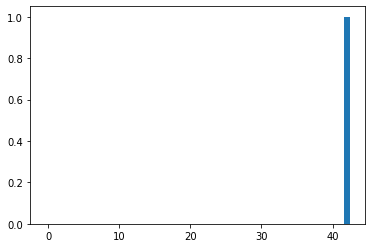

In [12]:
from matplotlib import pyplot
model1 = GradientBoostingClassifier(learning_rate=0.5, max_depth=3)
# model1 = GradientBoostingClassifier(max_depth=5,early_stopping_rounds=1,gamma=0.1,n_trees=2)
model1.fit(X_train, y_train)
predicted_y = model1.predict(X_test)
print(metrics.confusion_matrix(y_test, predicted_y))
print((accuracy_score(y_test, predicted_y)))
print('Gradient Boost model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, predicted_y)))
model1.feature_importances_

pyplot.bar(range(len(model1.feature_importances_)), model1.feature_importances_)
print(model1.feature_importances_)

In [ ]:
# Tried with differnt parameters the model was still over fitting.

# Gradient Boost with pca

In [13]:
X=dataset_pca.drop(columns=['label'])
y=dataset_pca['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=100)
model = GradientBoostingClassifier(learning_rate=0.5, max_depth=3)
model.fit(X_train, y_train)
predicted_y = model.predict(X_test)
print(metrics.classification_report(y_test, predicted_y))
print(metrics.confusion_matrix(y_test, predicted_y))

print('Gradient Boost model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, predicted_y)))

              precision    recall  f1-score   support

           0       0.90      0.85      0.88     27858
           1       0.92      0.95      0.93     49444

    accuracy                           0.91     77302
   macro avg       0.91      0.90      0.91     77302
weighted avg       0.91      0.91      0.91     77302

[[23802  4056]
 [ 2517 46927]]
Gradient Boost model accuracy score: 0.9150


# Gradient Boost with Minmax

In [14]:
X=dataset_minmax.drop(columns=['label'])
y=dataset_minmax['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=100)
model = GradientBoostingClassifier(learning_rate=0.5, max_depth=3)
model.fit(X_train, y_train)
predicted_y = model.predict(X_test)
print(metrics.classification_report(y_test, predicted_y))
print(metrics.confusion_matrix(y_test, predicted_y))

print('Gradient Boost model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, predicted_y)))

              precision    recall  f1-score   support

           0       0.91      0.92      0.92     27858
           1       0.96      0.95      0.95     49444

    accuracy                           0.94     77302
   macro avg       0.93      0.94      0.94     77302
weighted avg       0.94      0.94      0.94     77302

[[25716  2142]
 [ 2442 47002]]
Gradient Boost model accuracy score: 0.9407


# Gradient Boost with minmax and corr

In [15]:
X=dataset_minmax_corr.drop(columns=['label'])
y=dataset_minmax_corr['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=100)
model = GradientBoostingClassifier(learning_rate=0.5, max_depth=3)
model.fit(X_train, y_train)
predicted_y = model.predict(X_test)
print(metrics.classification_report(y_test, predicted_y))
print(metrics.confusion_matrix(y_test, predicted_y))

print('Gradient Boost model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, predicted_y)))

              precision    recall  f1-score   support

           0       0.91      0.91      0.91     27858
           1       0.95      0.95      0.95     49444

    accuracy                           0.93     77302
   macro avg       0.93      0.93      0.93     77302
weighted avg       0.93      0.93      0.93     77302

[[25284  2574]
 [ 2587 46857]]
Gradient Boost model accuracy score: 0.9332
